2019-07-19 18:32:38 MainProcess:INFO:root:Created Konrad object:
RCE(
    atmosphere=Atmosphere,
    radiation=RRTMG,
    ozone=OzonePressure,
    humidity=FixedRH,
    surface=SurfaceHeatCapacity,
    cloud=<konrad.cloud.ClearSky object at 0x7ff72131b550>,
    convection=HardAdjustment,
    lapserate=MoistLapseRate,
    upwelling=NoUpwelling,
    aerosol=<konrad.aerosol.NoAerosol object at 0x7ff72131bcf8>,
    max_duration=10000.0,
    timestep=0.6666666666666666,
    writeevery=100,
    max_iterations=15000.0,
    niter=0,
    delta=0.0001,
    deltaT=None,
    converged=False,
    outfile=/scratch/local1/convergenc3.nc,
    nchandler=None,
    experiment=RCE,
)
2019-07-19 18:32:38 MainProcess:INFO:konrad.core:Start RCE model run.
2019-07-19 18:32:38 MainProcess:INFO:konrad.core:Enter iteration 0.
2019-07-19 18:32:41 MainProcess:INFO:konrad.core:Enter iteration 100.
2019-07-19 18:32:43 MainProcess:INFO:konrad.core:Enter iteration 200.
2019-07-19 18:32:46 MainProcess:INFO:konrad.core:

2019-07-19 18:36:37 MainProcess:INFO:konrad.core:Enter iteration 10600.
2019-07-19 18:36:40 MainProcess:INFO:konrad.core:Enter iteration 10700.
2019-07-19 18:36:42 MainProcess:INFO:konrad.core:Enter iteration 10800.
2019-07-19 18:36:44 MainProcess:INFO:konrad.core:Enter iteration 10900.
2019-07-19 18:36:46 MainProcess:INFO:konrad.core:Enter iteration 11000.
2019-07-19 18:36:48 MainProcess:INFO:konrad.core:Enter iteration 11100.
2019-07-19 18:36:51 MainProcess:INFO:konrad.core:Enter iteration 11200.
2019-07-19 18:36:53 MainProcess:INFO:konrad.core:Enter iteration 11300.
2019-07-19 18:36:55 MainProcess:INFO:konrad.core:Enter iteration 11400.
2019-07-19 18:36:58 MainProcess:INFO:konrad.core:Enter iteration 11500.
2019-07-19 18:37:00 MainProcess:INFO:konrad.core:Enter iteration 11600.
2019-07-19 18:37:02 MainProcess:INFO:konrad.core:Enter iteration 11700.
2019-07-19 18:37:04 MainProcess:INFO:konrad.core:Enter iteration 11800.
2019-07-19 18:37:07 MainProcess:INFO:konrad.core:Enter iteration

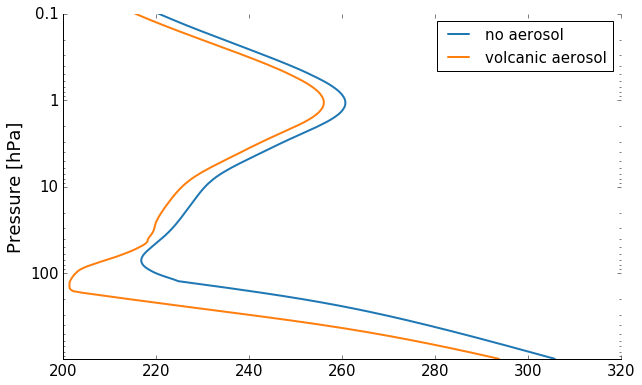

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
from typhon import plots

import konrad
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)
atmosphere = konrad.atmosphere.Atmosphere(plev)

#set constants
solarConstant=450
Albedo=0.25
maxDuration='10000d'
maxDuration2='1000d'
pressureMin=10
# Load a standard atmosphere.
#atmosphere = konrad.atmosphere.Atmosphere.from_netcdf(
#    ncfile='data/tropical-standard.nc',
#)
atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.

# Plot the initial temperature profile (for comparison).
plt.style.use(plots.styles('typhon'))
fig, ax = plt.subplots()
#plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')
atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.
# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    radiation=konrad.radiation.RRTMG(solar_constant=solarConstant),  # Use RRTMG radiation scheme.
    surface=konrad.surface.SurfaceHeatCapacity(albedo=Albedo),
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration=maxDuration,  # Set maximum runtime.
    aerosol=konrad.aerosol.NoAerosol(),
    outfile='/scratch/local1/convergenc3.nc',
    writeevery=100,
)
rce.run()  # Start the simulation.
# Plot the equilibrium temperature profile.
noAerosolAtm2=atmosphere
plots.profile_p_log(atmosphere['plev'][0:175], atmosphere['T'][-1, 0:175], label='no aerosol')
ax = plt.gca()
ax.set_ylim([pressureMin,max(atmosphere['plev'])])
plt.gca().invert_yaxis()
ax.legend()
#plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)
#atmosphere = konrad.atmosphere.Atmosphere(plev)
# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.SurfaceHeatCapacity(albedo=Albedo),
    radiation=konrad.radiation.RRTMG(solar_constant=solarConstant),  # Use RRTMG radiation scheme.
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration=maxDuration2,  # Set maximum runtime.
    aerosol=konrad.aerosol.VolcanoAerosol(),
    outfile='/scratch/local1/convergencAerosol3.nc',
    writeevery=100,
)
rce.run()  # Start the simulation.

# Plot the equilibrium temperature profile.
AerosolAtm2=atmosphere
plots.profile_p_log(atmosphere['plev'][0:175], atmosphere['T'][-1, 0:175], label='volcanic aerosol')
ax = plt.gca()
ax.set_ylim([pressureMin,max(atmosphere['plev'])])
plt.gca().invert_yaxis()
ax.legend()

#plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)
#atmosphere = konrad.atmosphere.Atmosphere(plev)


In [42]:


Tdifference=AerosolAtm['T'][-1, :]-noAerosolAtm['T'][-1, :]

In [ ]:
plt.close()
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,facecolor='white')
#plt.fig(facecolor='white')
plt.style.use('classic')
#plt.style.use(plots.styles('classic'))
ax.plot(Tdifference[0:175],atmosphere['plev'][0:175])
ax.set_yscale('log')
plt.figure(facecolor='white')
plt.gca().invert_yaxis()
plt.xlabel('temperature difference')
plt.ylabel('log(pfull)')
plt.grid(b=None, which='major', axis='both')
#plots.profile_p_log(atmosphere['plev'], Tdifference, label='RCE no aerosol')
#ax.legend()
plt.show()

In [55]:
atmosphere['plev'][0:175]

array([9.71559426e+04, 9.43725999e+04, 9.16428761e+04, 8.89667533e+04,
       8.63441690e+04, 8.37750174e+04, 8.12591510e+04, 7.87963816e+04,
       7.63864821e+04, 7.40291879e+04, 7.17241981e+04, 6.94711772e+04,
       6.72697565e+04, 6.51195355e+04, 6.30200834e+04, 6.09709403e+04,
       5.89716193e+04, 5.70216073e+04, 5.51203665e+04, 5.32673362e+04,
       5.14619338e+04, 4.97035565e+04, 4.79915824e+04, 4.63253720e+04,
       4.47042694e+04, 4.31276037e+04, 4.15946903e+04, 4.01048322e+04,
       3.86573208e+04, 3.72514379e+04, 3.58864560e+04, 3.45616400e+04,
       3.32762481e+04, 3.20295329e+04, 3.08207426e+04, 2.96491216e+04,
       2.85139120e+04, 2.74143542e+04, 2.63496879e+04, 2.53191529e+04,
       2.43219902e+04, 2.33574424e+04, 2.24247549e+04, 2.15231763e+04,
       2.06519594e+04, 1.98103616e+04, 1.89976457e+04, 1.82130805e+04,
       1.74559411e+04, 1.67255101e+04, 1.60210773e+04, 1.53419407e+04,
       1.46874068e+04, 1.40567911e+04, 1.34494182e+04, 1.28646224e+04,
      

In [ ]:
import xarray as xr

dataNoAerosol=xr.open_dataset('/scratch/local1/convergenc.nc')
dataAerosol=xr.open_dataset('/scratch/local1/convergencAerosol.nc')



In [61]:
#plots.profile_p_log(atmosphere[0:175], atmosphere['T'][-1, 0:175], label='no aerosol')
#ax.legend()
atmosphere['plev'][0:175].shape
#atmosphere['T'][-1, 0:175].shape

(175,)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from typhon import plots

import konrad
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)
atmosphere = konrad.atmosphere.Atmosphere(plev)
solarConstant=510

# Load a standard atmosphere.
#atmosphere = konrad.atmosphere.Atmosphere.from_netcdf(
#    ncfile='data/tropical-standard.nc',
#)
atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.

# Plot the initial temperature profile (for comparison).
plt.style.use(plots.styles('typhon'))
fig, ax = plt.subplots()
#plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :], label='Initial state')
atmosphere.tracegases_rcemip()  # Atmosphere composition according to RCEMIP.
# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    #surface=surface,
    radiation=konrad.radiation.RRTMG(solar_constant=solarConstant),  # Use RRTMG radiation scheme.
    surface=konrad.surface.SurfaceHeatCapacity(albedo=0.3),
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration='6000d',  # Set maximum runtime.
    aerosol=konrad.aerosol.NoAerosol(),
    #outfile='/scratch/local1/convergenc.nc',
    #writeevery=100,
)
rce.run()  # Start the simulation.
# Plot the equilibrium temperature profile.
noAerosolAtm=atmosphere
plots.profile_p_log(atmosphere['plev'][0:175], atmosphere['T'][-1, 0:175], label='no aerosol')
ax.legend()

# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.SurfaceHeatCapacity(albedo=0.3),
    radiation=konrad.radiation.RRTMG(solar_constant=solarConstant),  # Use RRTMG radiation scheme.
    convection=konrad.convection.HardAdjustment(),  # Perform a hard convective adjustment.
    lapserate=konrad.lapserate.MoistLapseRate(),  # Adjust towards a moist adiabat.
    timestep='16h',  # Set timestep in model time.
    max_duration='6000d',  # Set maximum runtime.
    aerosol=konrad.aerosol.VolcanoAerosol(),
    #outfile='/scratch/local1/convergencAerosol.nc',
    #writeevery=100,
)
rce.run()  # Start the simulation.

# Plot the equilibrium temperature profile.
AerosolAtm=atmosphere
plots.profile_p_log(atmosphere['plev'][0:175], atmosphere['T'][-1, 0:175], label='volcanic aerosol')
ax.legend()

#plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 201)
#atmosphere = konrad.atmosphere.Atmosphere(plev)